In [423]:
import pandas as pd
import numpy as np

print("Starting")
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

#submission = pd.read_csv('dataset/train.csv')


Starting


In [424]:
train.head()

,encounter_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,tel_41,tel_42,tel_43,tel_44,tel_45,tel_46,tel_47,tel_48,tel_49,diabetesMed
0,178974720,61754247,Caucasian,Male,[80-90),?,1,3,7,6,...,No,Steady,No,No,No,No,No,Ch,>30,1
1,111231666,110498427,AfricanAmerican,Female,[50-60),?,3,1,1,2,...,No,No,Steady,No,No,No,No,No,NO,1
2,134751624,91719990,Caucasian,Male,[80-90),?,1,1,7,5,...,No,Down,No,No,No,No,No,Ch,>30,1
3,254196636,1897758,Caucasian,Female,[70-80),?,3,1,1,3,...,No,Steady,No,No,No,No,No,Ch,>30,1
4,432617750,34636617,Asian,Female,[80-90),?,2,3,5,2,...,No,No,No,No,No,No,No,No,NO,1


In [536]:
def age_cat(age):
    if  age == '[0-10)' or age == '[10-20)' or age == '[20-30)'or age == '[30-40)'or age == '[40-50)' :
        return 0
    else:
        return 1
def if_female(gender):
    if  gender == 'Male' :
        return 0
    else:
        return 1
def no_42(tel_42):
    if  tel_42 == 'No' :
        return 1
    else:
        return 0
def no_49(tel_49):
    if  tel_49 == 'NO' :
        return 1
    else:
        return 0
def high_14(tel_14):
    if  tel_14 == '>8' :
        return 1
    else:
        return 0
def no_15(tel_15):
    if  tel_15 == 'No' :
        return 0
    else:
        return 1
def no_21(tel_21):
    if  tel_21 == 'No' :
        return 0
    else:
        return 1
def no_22(tel_22):
    if  tel_22 == 'No' :
        return 0
    else:
        return 1
def no_24(tel_24):
    if  tel_24 == 'No' :
        return 0
    else:
        return 1
def no_25(tel_25):
    if  tel_25 == 'No' :
        return 0
    else:
        return 1
def no_48(tel_48):
    if  tel_48 == 'No' :
        return 0
    else:
        return 1

In [537]:
train['age_50plus']=train['age'].apply(lambda x: age_cat(x))
train['if_female']=train['gender'].apply(lambda x: if_female(x))
train['no_42']=train['tel_42'].apply(lambda x: no_42(x))
train['no_49']=train['tel_49'].apply(lambda x: no_49(x))
train['high_14']=train['tel_14'].apply(lambda x: high_14(x))
train['no_15']=train['tel_15'].apply(lambda x: no_15(x))
train['no_21']=train['tel_21'].apply(lambda x: no_21(x))
train['no_22']=train['tel_22'].apply(lambda x: no_22(x))
train['no_24']=train['tel_24'].apply(lambda x: no_24(x))
train['no_25']=train['tel_25'].apply(lambda x: no_25(x))
train['no_48']=train['tel_48'].apply(lambda x: no_48(x))

test['age_50plus']=test['age'].apply(lambda x: age_cat(x))
test['if_female']=test['gender'].apply(lambda x: if_female(x))
test['no_42']=test['tel_42'].apply(lambda x: no_42(x))
test['no_49']=test['tel_49'].apply(lambda x: no_49(x))
test['high_14']=test['tel_14'].apply(lambda x: high_14(x))
test['no_15']=test['tel_15'].apply(lambda x: no_15(x))
test['no_21']=test['tel_21'].apply(lambda x: no_21(x))
test['no_22']=test['tel_22'].apply(lambda x: no_22(x))
test['no_24']=test['tel_24'].apply(lambda x: no_24(x))
test['no_25']=test['tel_25'].apply(lambda x: no_25(x))
test['no_48']=test['tel_48'].apply(lambda x: no_48(x))

In [427]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [538]:
target_count = train.diabetesMed.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 1489
Class 1: 13207
Proportion: 0.11 : 1


In [539]:
# Class count
count_class_0, count_class_1 = train.diabetesMed.value_counts()
print(count_class_0)
print(count_class_1)

13207
1489


In [540]:
# under sampling
df_class_yes = train[train['diabetesMed'] == 1]
df_class_no = train[train['diabetesMed'] == 0]

df_class_yes_under = df_class_yes.sample(count_class_1)
df_train_under = pd.concat([df_class_yes_under, df_class_no], axis=0)

print('Random under-sampling:')
print(df_train_under.diabetesMed.value_counts())

# Over sampling
df_class_yes = train[train['diabetesMed'] == 1]
df_class_no = train[train['diabetesMed'] == 0]

df_class_no_over = df_class_no.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_yes, df_class_no_over], axis=0)

print('Random over-sampling:')
print(df_train_over.diabetesMed.value_counts())

Random under-sampling:
1    1489
0    1489
Name: diabetesMed, dtype: int64
Random over-sampling:
1    13207
0    13207
Name: diabetesMed, dtype: int64


In [351]:
train[['race', 'diabetesMed']].groupby(['race'], as_index=False).mean().sort_values(by='diabetesMed', ascending=False)

,race,diabetesMed
2,Asian,0.941748
1,AfricanAmerican,0.934330
3,Caucasian,0.891405
5,Other,0.890411
0,?,0.881306
4,Hispanic,0.877698


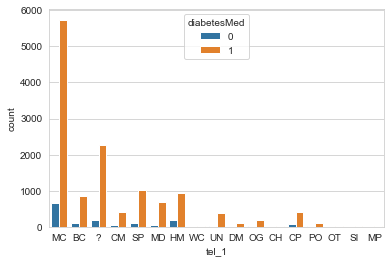

In [445]:
sns.countplot(train['tel_1'], hue=train['diabetesMed'])

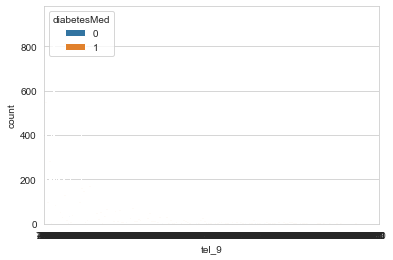

In [446]:
sns.countplot(train['tel_9'], hue=train['diabetesMed'])

In [447]:
train[['tel_9', 'diabetesMed']].groupby(['tel_9'], as_index=False).mean().sort_values(by='diabetesMed', ascending=False)

,tel_9,diabetesMed
0,11,1.0
287,551,1.0
319,591,1.0
316,586,1.0
312,581,1.0
...,...,...
418,806,0.0
285,541,0.0
425,816,0.0
451,866,0.0


In [459]:
train['diabetesMed'].groupby(train['tel_14']).mean()

tel_14
>7      0.886885
>8      0.963528
None    0.893682
Norm    0.887952
Name: diabetesMed, dtype: float64

In [535]:
train['diabetesMed'].groupby(train['tel_24']).mean()

tel_24
Down      1.000000
No        0.888247
Steady    1.000000
Up        1.000000
Name: diabetesMed, dtype: float64

In [353]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14696 entries, 0 to 14695
Data columns (total 54 columns):
encounter_id                14696 non-null int64
patient_id                  14696 non-null int64
race                        14696 non-null object
gender                      14696 non-null object
age                         14696 non-null object
weight                      14696 non-null object
admission_type_id           14696 non-null int64
discharge_disposition_id    14696 non-null int64
admission_source_id         14696 non-null int64
time_in_hospital            14696 non-null int64
tel_1                       14696 non-null object
tel_2                       14696 non-null object
tel_3                       14696 non-null int64
tel_4                       14696 non-null int64
tel_5                       14696 non-null int64
tel_6                       14696 non-null int64
tel_7                       14696 non-null int64
tel_8                       14696 non-null int64
tel

In [354]:
train.describe()

,encounter_id,patient_id,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_3,tel_4,tel_5,tel_6,tel_7,tel_8,tel_12,diabetesMed,age_50plus,if_female,no_42,no_49
count,1.469600e+04,1.469600e+04,14696.000000,14696.000000,14696.000000,14696.000000,14696.000000,14696.000000,14696.000000,14696.000000,14696.000000,14696.000000,14696.000000,14696.000000,14696.000000,14696.000000,14696.000000,14696.0
mean,2.226586e+08,6.750997e+07,1.886296,3.171407,5.271911,4.325463,42.716930,1.325327,16.881941,0.461350,0.253879,0.654192,7.735915,0.898680,0.856015,0.537833,0.350095,0.0
std,8.736975e+07,3.524797e+07,1.267142,4.424569,3.352831,2.915252,20.236116,1.720473,8.168955,1.478024,0.985633,1.272704,1.823443,0.301762,0.351086,0.498584,0.477016,0.0
min,1.016804e+08,7.290000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.546245e+08,4.080177e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.0
50%,2.042736e+08,6.383513e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,16.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,1.000000,0.000000,0.0
75%,2.745409e+08,9.240947e+07,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,21.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.0
max,4.438672e+08,1.893659e+08,8.000000,28.000000,25.000000,14.000000,113.000000,6.000000,75.000000,42.000000,42.000000,15.000000,16.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [363]:
corr = train.corr()

In [408]:
corr

,encounter_id,patient_id,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_3,tel_4,tel_5,tel_6,tel_7,tel_8,tel_12,diabetesMed,age_50plus,if_female,no_42,no_49
encounter_id,1.000000,0.338983,-0.103913,-0.023383,0.019084,-0.041221,0.012665,0.014898,0.012045,0.021519,0.002729,0.009336,0.202846,-0.286876,0.024973,-0.011812,0.097411,NaN
patient_id,0.338983,1.000000,-0.027503,-0.011603,0.030602,-0.006459,0.011322,-0.008839,-0.049212,0.037445,0.020339,-0.007955,0.174570,-0.115115,0.006049,-0.009608,0.099703,NaN
admission_type_id,-0.103913,-0.027503,1.000000,-0.001888,-0.196849,-0.004903,-0.103116,0.179066,0.089249,0.014604,-0.037692,-0.037000,-0.116255,0.039632,-0.004069,-0.023835,0.035014,NaN
discharge_disposition_id,-0.023383,-0.011603,-0.001888,1.000000,-0.020417,0.191990,0.067443,0.005788,0.155043,0.014681,-0.019748,0.035071,0.113127,0.025037,0.102890,0.023234,-0.039300,NaN
admission_source_id,0.019084,0.030602,-0.196849,-0.020417,1.000000,0.007265,0.192708,-0.101973,-0.056033,-0.026414,0.066029,0.046341,0.118713,0.002951,-0.025184,-0.002572,-0.019316,NaN
time_in_hospital,-0.041221,-0.006459,-0.004903,0.191990,0.007265,1.000000,0.336860,0.168931,0.466596,0.008581,-0.002660,0.074227,0.223119,0.058605,0.076772,0.032517,-0.121629,NaN
tel_3,0.012665,0.011322,-0.103116,0.067443,0.192708,0.336860,1.000000,0.042951,0.308938,0.017672,0.020625,0.044394,0.193202,0.027843,0.034492,-0.000739,-0.117198,NaN
tel_4,0.014898,-0.008839,0.179066,0.005788,-0.101973,0.168931,0.042951,1.000000,0.367638,-0.012169,-0.040603,-0.053849,0.067907,-0.007024,0.037898,-0.057783,-0.017231,NaN
tel_5,0.012045,-0.049212,0.089249,0.155043,-0.056033,0.466596,0.308938,0.367638,1.000000,0.041642,0.006208,0.073008,0.247780,0.120670,0.094867,0.031814,-0.173982,NaN
tel_6,0.021519,0.037445,0.014604,0.014681,-0.026414,0.008581,0.017672,-0.012169,0.041642,1.000000,0.068140,0.111552,0.076014,-0.009010,0.019437,0.009926,0.030245,NaN


In [410]:
corelation = train['tel_3'].corr(train['diabetesMed'])
print(corelation)

0.02784319007200434


In [365]:
print("The number of traning examples(data points) = %i " % train.shape[0])
print("The number of features we have = %i " % train.shape[1])

The number of traning examples(data points) = 14696 
The number of features we have = 54 


In [432]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

In [541]:
#original 
#X = train[['time_in_hospital', 'tel_4','tel_5', 'tel_8','tel_12','age_50plus','if_female','no_42','no_49']]
#X = train[['time_in_hospital', 'tel_3','no_42']]
#y = train['diabetesMed']

#under sampling
#X = df_train_under[['time_in_hospital', 'tel_4','tel_5', 'tel_8','tel_12','age_50plus','if_female','no_42','no_49']]
#y = df_train_under['diabetesMed']

#over sampling
X = df_train_over[['time_in_hospital', 'tel_3','tel_4','tel_5', 'tel_6','tel_8','tel_12','age_50plus','if_female','no_42','no_49','high_14','no_15','no_21','no_22','no_24','no_25','no_48']]
#X = df_train_over[['time_in_hospital', 'tel_3','tel_5','no_42']]
y = df_train_over['diabetesMed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [543]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


C:\Users\106399\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [544]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
score = 100*recall_score(y_test,predictions,average='weighted')
print(score)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3987
           1       1.00      0.97      0.99      3938

    accuracy                           0.99      7925
   macro avg       0.99      0.99      0.99      7925
weighted avg       0.99      0.99      0.99      7925

98.62460567823344


In [371]:
test['diabetesMed'] = logmodel.predict(test[['time_in_hospital', 'tel_4','tel_5', 'tel_8','tel_12','age_50plus','if_female','no_42','no_49']])
#final_test['encounter_id'] = test['encounter_id']

In [373]:
submission = test[['encounter_id','diabetesMed']]

submission.to_csv("submission.csv", index=False)

submission.tail()

,encounter_id,diabetesMed
7965,86749284,1
7966,135741342,0
7967,65660634,0
7968,73248582,0
7969,48791304,1


In [374]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\106399\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00989951 0.01753402 0.0052017  0.01587526 0.00366498 0.00413915
 0.0059829  0.00141719 0.00255581 0.43782298 0.00199328 0.00076987
 0.10189515 0.0711979  0.04294404 0.03410128 0.02140456 0.22160042]


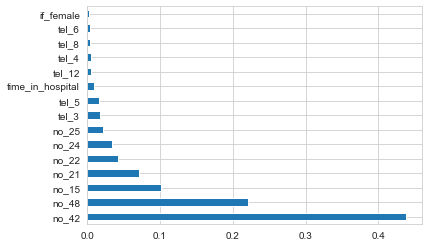

In [542]:
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(15).plot(kind ='barh')
plt.show()

In [509]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [510]:
print(classification_report(y_test,y_pred))
score = 100*recall_score(y_test,y_pred,average='weighted')
print(score)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3978
           1       1.00      0.92      0.96      3947

    accuracy                           0.96      7925
   macro avg       0.96      0.96      0.96      7925
weighted avg       0.96      0.96      0.96      7925

95.93690851735016
